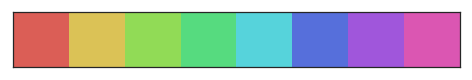

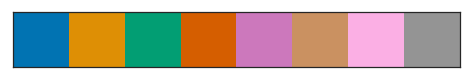

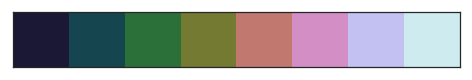

In [463]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.palplot(sns.color_palette("hls", 8))
sns.palplot(sns.color_palette("colorblind", 8))
sns.palplot(sns.color_palette("cubehelix", 8))
sns.set_palette("cubehelix_r")

In [464]:
# split data into 8 different arrays
Diving_10m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Diving_10m')
Archery = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Archery')
Fencing_Epee = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Fencing_Epee')
Modern_Pentathlon = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Modern_Pentathlon')
Pole_Vault = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Pole_Vault')
Swimming_100m_Freestyle = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Swimming_100m_Freestyle')
Cycling_Road = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Cycling_Road')
Athletes_100m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Athletes_100m')

In [465]:
def plot_means(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [466]:
def plot_median(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [467]:
# t-test for male and female participants in athletics_100_m finals
#stats.ttest_ind(males, females)

def ttest(sportart,kategorie):
    '''conducts a t test for given competition
    
    Args:
        competition: olympic sports competition to evaluate
    
    Returns:
        statistic, pvalue : The calculated t-statistic and the two-tailed p-value.
    '''
    kat={'words':4,'edits':5,'links':6}
    k=kat[kategorie]
    
    # create subgroups of male and female atheletes
    men = sportart.loc[sportart['Gender'] == 'Men']
    women = sportart.loc[sportart['Gender'] == 'Women']
    
    print(kategorie)

    y_mean = [women['Wiki_Count'].mean(), men['Wiki_Count'].mean()]
    y_median = [women['Wiki_Count'].median(), men['Wiki_Count'].median()]
    mean_women = y_mean[0]
    mean_men = y_mean[1]
    
    print('%d women, mean: %f, median: %f' % (len(women), mean_women, y_median[0]) )
    print('%d men, mean: %f, median: %f' % (len(men), mean_men, y_median[1]) )  
    
    plt.subplot(1, 2, 1)
    plot_means([mean_women, mean_men])
    plt.subplot(1, 2, 2)
    plot_median([y_median[0], y_median[1]])

    plt.show()
    
    # conduct t test
    
    return stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])

words
80 women, mean: 334.900000, median: 124.500000
84 men, mean: 563.940476, median: 159.500000


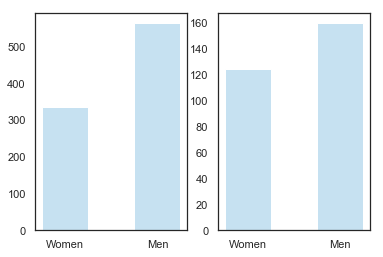

Ttest_indResult(statistic=1.4554879771696898, pvalue=0.14746931957531356)


In [468]:
# words,edits,links
print(ttest(Athletes_100m,'words')) 

In [469]:
# Put all data in one dataframe
alldata = pd.DataFrame(Diving_10m).append(Archery).append(Fencing_Epee).append(Modern_Pentathlon).append(Pole_Vault).append(Swimming_100m_Freestyle).append(Cycling_Road).append(Athletes_100m)

In [470]:
allmen = alldata.loc[alldata['Gender'] == 'Men']
allwomen = alldata.loc[alldata['Gender'] == 'Women']
withoutMen = alldata.loc[alldata['Gender'] != 'Men']
unassigned = withoutMen.loc[withoutMen['Gender'] != 'Women']

print('Women: ' + str(len(allwomen)) + ' Men: ' +str(len(allmen)) +' Unassigned: ' + str(len(unassigned)))

Women: 398 Men: 485 Unassigned: 2


In [471]:
#Extreme values on wordcount column
def extremes_per_sport(data, gender):
    #list of all sports disciplines to be used as indices in resulting data frame
    disciplines = data.Discipline.unique()
    #column names to be used in resulting data frame
    cols = ['Max', 'Min', 'Mean', 'Median']
    max = []
    min = []
    mean = []
    median = []
    all_data_for_spec_gender = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        all_for_discipline = all_data_for_spec_gender.loc[all_data_for_spec_gender['Discipline'] == discipline]
        max.append(all_for_discipline.Wiki_Count.max())
        min.append(all_for_discipline.Wiki_Count.min())
        mean.append(all_for_discipline.Wiki_Count.mean())
        median.append(all_for_discipline.Wiki_Count.median())
    return pd.DataFrame({'Max' :np.asarray(max),
                         'Min' :np.asarray(min),
                         'Mean':np.asarray(mean),
                         'Median':np.asarray(median)}, index=disciplines)

In [472]:
def plot(data):
    # labels for y axis
    labels = data.Discipline.unique()
    # amount of ticks on y axis
    ind = np.arange(len(labels))
    extremes_men = extremes_per_sport(data, 'Men')
    extremes_women = extremes_per_sport(data, 'Women')
    
    width = 0.35
    plt.figure(1)
    fig, ax = plt.subplots(2,2,figsize=(20,15))
    ax[0,0].bar(ind - width/2, extremes_men.Max, width, label='Men')
    ax[0,0].bar(ind + width/2, extremes_women.Max, width, label='Women')
    
    ax[0,0].legend()
    ax[0,0].set_xticks(ind)
    ax[0,0].set_xticklabels(labels)
    ax[0,0].set_ylabel('Wordcount')
    ax[0,0].set_title('Max Wordcount')
    

    ax[0,1].bar(ind - width/2, extremes_men.Min, width, label='Men')
    ax[0,1].bar(ind + width/2, extremes_women.Min, width, label='Women')
    
    ax[0,1].legend()
    
    ax[0,1].set_xticks(ind)
    ax[0,1].set_xticklabels(labels)
    ax[0,1].set_ylabel('Wordcount')
    ax[0,1].set_title('Min Wordcount')
    
    ax[1,0].bar(ind - width/2, extremes_men.Mean, width, label='Men')
    ax[1,0].bar(ind + width/2, extremes_women.Mean, width, label='Women')
    
    ax[1,0].legend()
    
    ax[1,0].set_xticks(ind)
    ax[1,0].set_xticklabels(labels)
    ax[1,0].set_ylabel('Wordcount')
    ax[1,0].set_title('Mean Wordcount')
    
    ax[1,1].bar(ind - width/2, extremes_men.Median, width, label='Men')
    ax[1,1].bar(ind + width/2, extremes_women.Median, width, label='Women')
    
    ax[1,1].legend()
    
    ax[1,1].set_xticks(ind)
    ax[1,1].set_xticklabels(labels)
    ax[1,1].set_ylabel('Wordcount')
    ax[1,1].set_title('Median Wordcount')
 
    plt.show()

<Figure size 432x288 with 0 Axes>

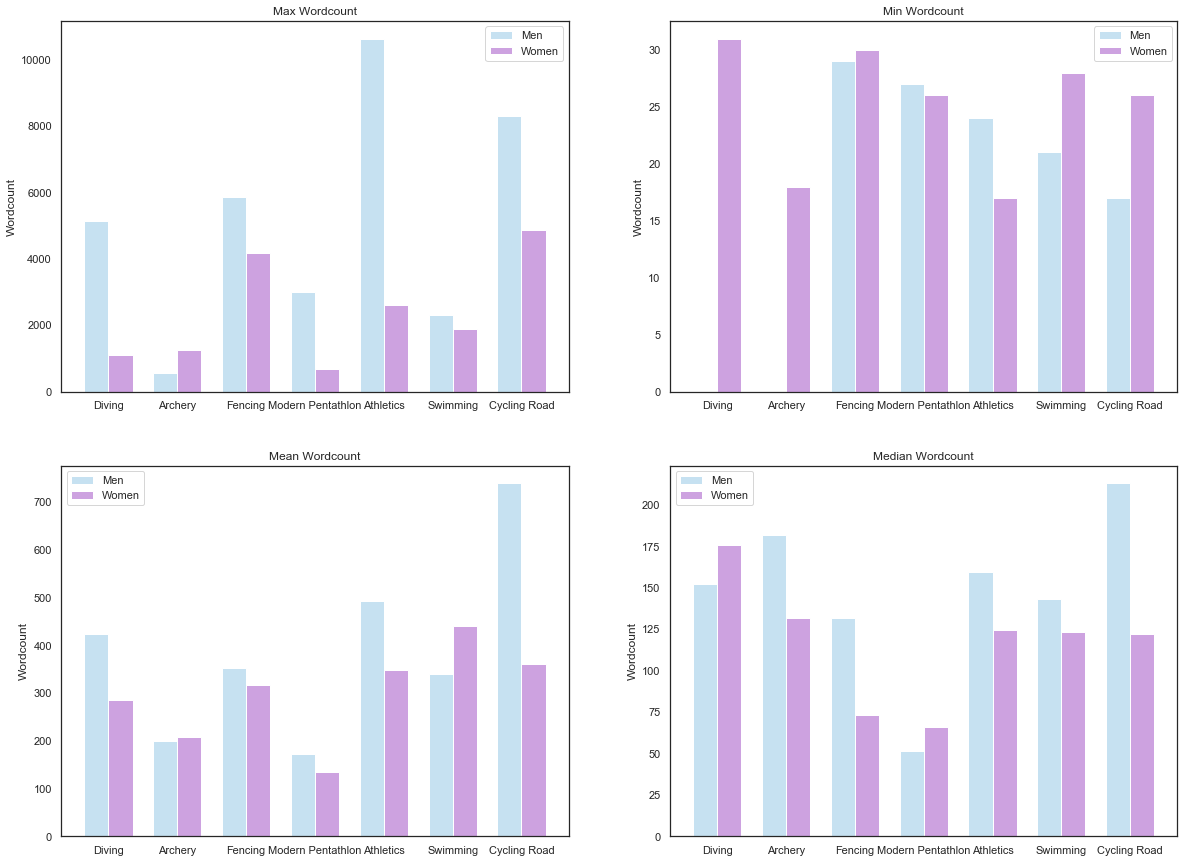

In [473]:
plot(alldata)

In [474]:
# extremes_per_sport(alldata, 'Men')

In [475]:
# extremes_per_sport(alldata, 'Women')

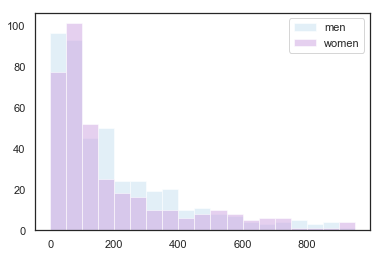

In [476]:
men = alldata.loc[alldata['Gender'] == 'Men'].Wiki_Count
women = alldata.loc[alldata['Gender'] == 'Women'].Wiki_Count

bins = range(0, 1000, 50)

plt.hist(men, bins, alpha=0.5, label='men')
plt.hist(women, bins, alpha=0.5, label='women')
plt.legend()
plt.show()

No handles with labels found to put in legend.


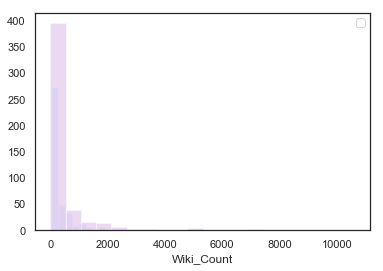

In [477]:
ax = sns.distplot(women, kde=False, bins=20)
ax = sns.distplot(men, kde=False, bins=20)
ax.legend()

In [478]:
#Number of ppl of specified gender per sport
def gender_per_sport(data):
    disciplines = data.Discipline.unique()
    female = []
    male = []
    equal_genders = []
    allwomen = data.loc[data['Gender'] == 'Women']
    allmen = data.loc[data['Gender'] == 'Men']
    for discipline in disciplines:
        amount_of_women = len(allwomen.loc[allwomen['Discipline'] == discipline])
        amount_of_men = len(allmen.loc[allmen['Discipline'] == discipline])
        female.append(amount_of_women)
        male.append(amount_of_men)
        if amount_of_men == amount_of_women:
            equal_genders.append('true')
        else:
            equal_genders.append('false')
    return pd.DataFrame({'f':np.asarray(female),
                        'm': np.asarray(male),
                        'equal': np.asarray(equal_genders)}, index=disciplines)

In [479]:
# gender_per_sport(alldata)
#Male and female athletes per sport, where there are equal numbers of participants

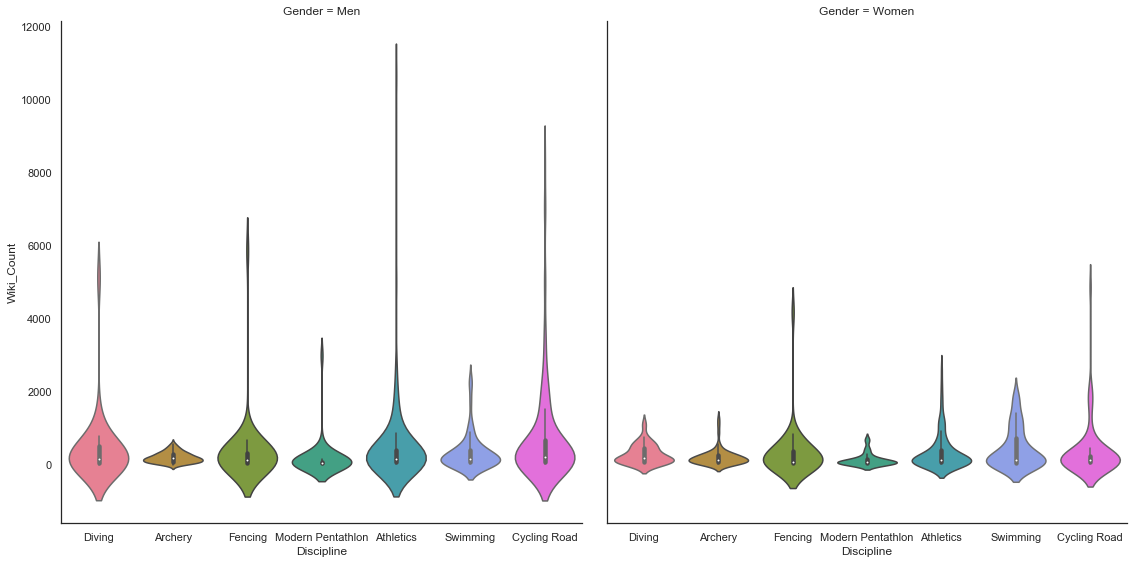

In [480]:
g = sns.FacetGrid(alldata, col="Gender", height=8, hue="Discipline")
g.map(sns.violinplot,"Discipline", "Wiki_Count", order=alldata.Discipline.unique())
#why smaller than 0??

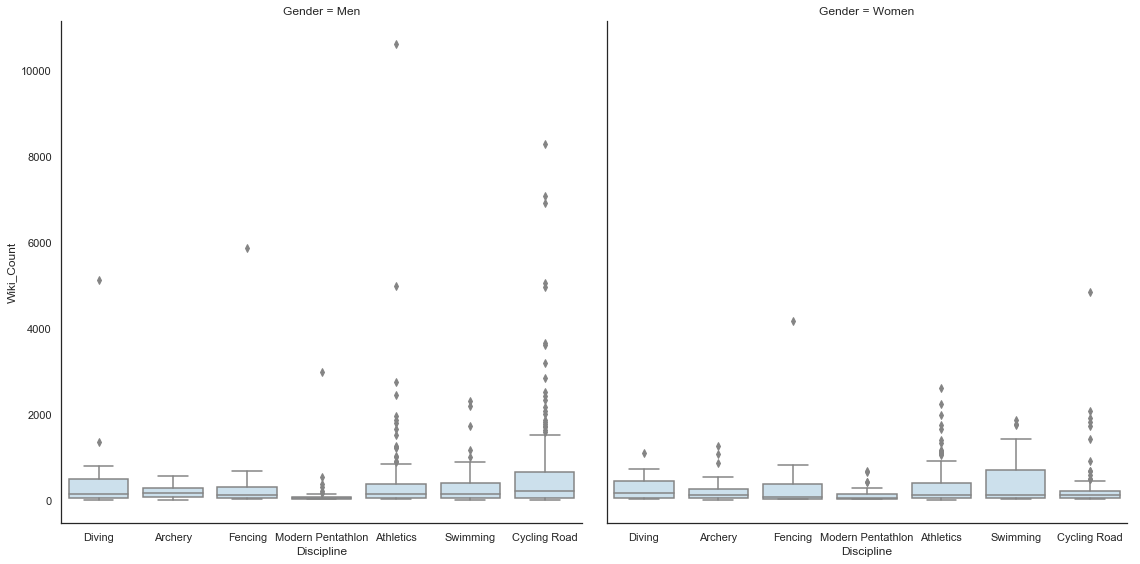

In [481]:
g = sns.FacetGrid(alldata, col="Gender", height=8)
g.map(sns.boxplot,"Discipline", "Wiki_Count", order=alldata.Discipline.unique())

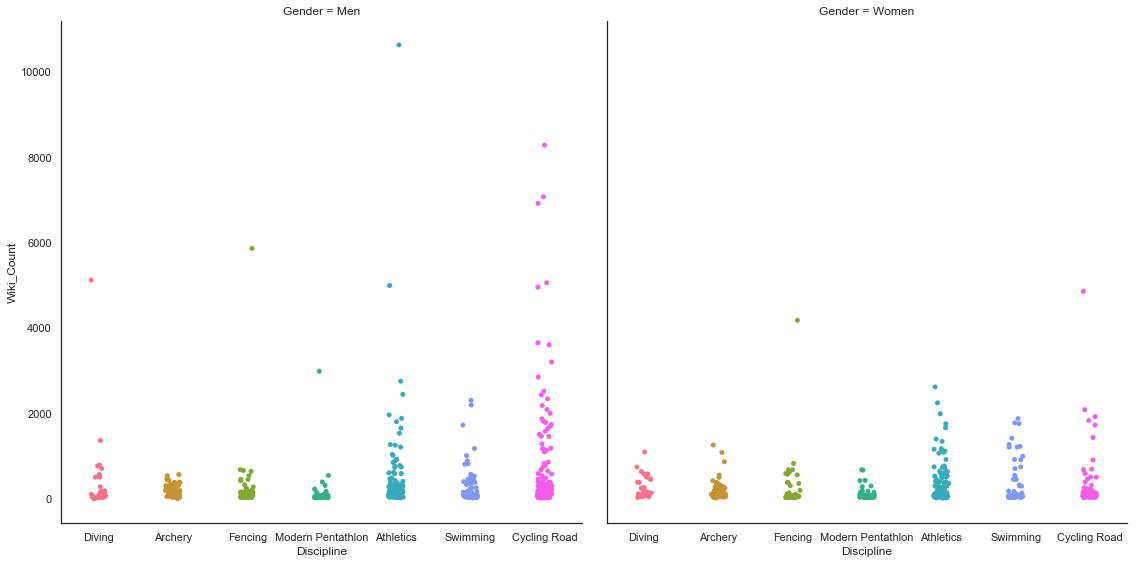

In [482]:
g = sns.FacetGrid(alldata, col="Gender",  height=8, aspect=1, hue="Discipline")
g.map(sns.stripplot,"Discipline", "Wiki_Count", order = alldata.Discipline.unique())